In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [3]:
# df_pathway = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
# 对pathway_name进行去重，打印
# df_pathway['pathway_class'].drop_duplicates()

In [4]:
# Axitinib Navitoclax Picolinici-acid Campthotecin BMS-754807 Afatinib Erlotinib Gefitinib
# EGFR
drug_name = 'Gefitinib' # 靶向药物 EGFR
# target_pathway = ['EGFR tyrosine kinase inhibitor resistance','Non-small cell lung cancer','MAPK signaling pathway','PI3K signaling','Cell cycle','Apoptosis,'Small cell lung cancer']
target_pathway = ['MAPK signaling','Non-small cell lung cancer','PI3K signaling','ERK signaling','Cell cycle','Apoptosis']

In [5]:
dict = {
    "<PAD>": 0,"<UNK>": 1,"<START>": 2,"<STOP>": 3,"(": 4,")": 5,"1": 6,"2": 7,"3": 8,"4": 9,"5": 10,"6": 11,"7": 12,"8": 13,"9": 14,"%10": 15,"%11": 16,"%12": 17,"%13": 18,"%14": 19,"%15": 20,"%16": 21,"%17": 22,"%18": 23,"%19": 24,"%20": 25,"%21": 26,"%22": 27,"%23": 28,"%24": 29,"%25": 30,"%26": 31,"%27": 32,"%28": 33,"%29": 34,"O": 35,"N": 36,"=": 37,"C": 38," ": 39,"Cl": 40,".": 41,"[Pt]": 42,"F": 43,"S": 44,"#": 45,"I": 46,"[Pt+2]": 47,"[NH-]": 48,"[O-]": 49,"[N+]": 50,"B": 51,"P": 52,"Br": 53,"[S+]": 54,"[Br-]": 55
}

In [6]:
df_smiles = pd.read_csv('../../data/CCLE-GDSC-SMILES.csv')
df_smiles.head()

,CID,SMILES,DRUG_NAME
0,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,Camptothecin
1,13342,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,Vinblastine
2,5702198,N.N.Cl[Pt]Cl,Cisplatin
3,6253,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,Cytarabine
4,148124,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,Docetaxel


In [7]:
# 筛选出药物是Oxaliplatin
df_smiles_single_drug = df_smiles[df_smiles['DRUG_NAME'] == drug_name]
df_smiles_single_drug.head()

,CID,SMILES,DRUG_NAME
6,123631,COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OC...,Gefitinib


In [8]:
df_smiles_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_smiles_attentions_gep.csv')
df_smiles_att.head()

,drug,OncotreeCode,cell_line,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,5-Fluorouracil,PCM,OPM2,0.002356,0.003071,0.002732,0.004914,0.004261,0.004978,0.001775,...,0.026119,0.028015,0.010345,0.021115,0.011152,0.008832,0.005626,0.006518,0.009014,0.005490
1,5-azacytidine,PCM,OPM2,0.002204,0.002897,0.002576,0.004770,0.004089,0.004820,0.001639,...,0.017020,0.008060,0.010243,0.006067,0.029940,0.015759,0.011790,0.008960,0.005428,0.005950
2,A-366,PCM,OPM2,0.002104,0.002775,0.002463,0.004676,0.003960,0.004714,0.001537,...,0.006011,0.005778,0.009135,0.004954,0.008338,0.016123,0.018105,0.010478,0.005555,0.005962
3,ABT737,PCM,OPM2,0.001874,0.002511,0.002220,0.004436,0.003700,0.004466,0.001332,...,0.005321,0.005187,0.006720,0.006663,0.007908,0.006287,0.005171,0.004562,0.009057,0.006331
4,AGI-5198,PCM,OPM2,0.001997,0.002653,0.002349,0.004567,0.003842,0.004599,0.001443,...,0.008812,0.008993,0.008153,0.015015,0.015713,0.017204,0.017644,0.010247,0.005821,0.006480


In [9]:
# 筛选出药物是Oxaliplatin
df_smiles_att_single_drug = df_smiles_att[df_smiles_att['drug'] == drug_name]
# 筛选出cell_line = ['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1']
# NSCLC:['EKVX','HCC827','LCLC103H','NCIH1299','NCIH2170','NCIH2228','PC14','RERFLCSQ1']
# LUAD:['NCIH2228','HCC827','EKVX','PC14']
# SCLC:['NCIH526','LU135','NCIH146','NCIH1963']
cell_line = ['HCC827','PC14'] # LUAD 发生EGFR突变：HCC827，PC14
# cell_line = ['NCIH526','LU135','NCIH146','NCIH1963']
df_smiles_att_single_drug = df_smiles_att_single_drug[df_smiles_att_single_drug['cell_line'].isin(cell_line)]
print(df_smiles_att_single_drug.shape)
df_smiles_att_single_drug.head()

(2, 259)


,drug,OncotreeCode,cell_line,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
9578,Gefitinib,LUAD,HCC827,0.002005,0.002668,0.002344,0.004624,0.003864,0.004605,0.001465,...,0.006126,0.006081,0.006246,0.005085,0.005944,0.011567,0.007837,0.005420,0.004247,0.005052
9802,Gefitinib,LUAD,PC14,0.002007,0.002662,0.002353,0.004605,0.003862,0.004597,0.001460,...,0.016671,0.008585,0.007629,0.005765,0.011256,0.006232,0.005238,0.004248,0.003341,0.004389


In [16]:
# 读取drug_sensitivity数据
df_drug_sensitivity = pd.read_csv('../../data/drug_sensitivity_lung_CellBlind_test&prediction.csv')
# 筛选出cell_line = ['NCIH2228','HCC827','EKVX','PC14']，drug = Gefitinib的数据
df_drug_sensitivity_single_drug = df_drug_sensitivity[(df_drug_sensitivity['cell_line'].isin(['HCC827','PC14']))] #  & (df_drug_sensitivity['drug'] == drug_name)
print(df_drug_sensitivity_single_drug.shape)
df_drug_sensitivity_single_drug.head(500)

(449, 6)


,Unnamed: 0,drug,cell_line,IC50,OncotreeCode,prediction
9492,9492,5-Fluorouracil,HCC827,5.191741,LUAD,5.472933
9493,9493,5-azacytidine,HCC827,3.595454,LUAD,4.412920
9494,9494,A-366,HCC827,6.028838,LUAD,5.417455
9495,9495,ABT737,HCC827,4.389625,LUAD,2.832198
9496,9496,AGI-5198,HCC827,5.698307,LUAD,5.063128
...,...,...,...,...,...,...
9936,9936,YK-4-279,PC14,1.433698,LUAD,2.862487
9937,9937,ZM447439,PC14,1.838791,LUAD,3.060148
9938,9938,Zoledronate,PC14,5.591058,LUAD,4.491779
9939,9939,alpha-lipoic acid,PC14,8.290598,LUAD,8.345188


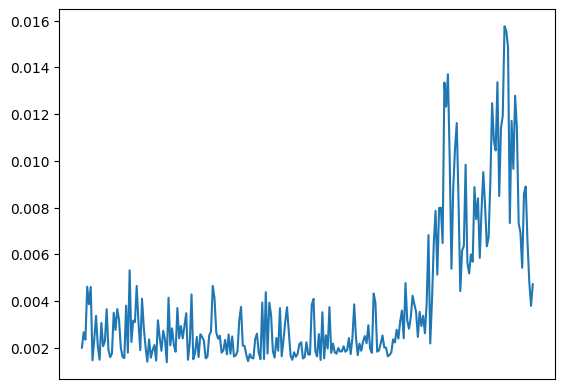

In [227]:
# 将df_smiles_att_oxaliplatin从第四列开始的数据取均值
df_smiles_att_single_drug_mean = df_smiles_att_single_drug.iloc[:, 3:].mean(axis=0)
# 将df_smiles_att_oxaliplatin_mean画成折线图
plt.plot(df_smiles_att_single_drug_mean)
# 不显示X轴的信息
plt.xticks([])
plt.show()

In [228]:
from pytoda.smiles import SMILESTokenizer
smiles_language_filepath = '../../../data/smiles_language/tokenizer_customized'
# Load SMILES language
smiles_language = SMILESTokenizer.from_pretrained(smiles_language_filepath)
smiles_language.set_encoding_transforms(
    add_start_and_stop=True,
    padding=True,
    padding_length=256,
    # padding_length=params.get("smiles_padding_length", None),
)
smiles_language.set_smiles_transforms(
    augment=False,
    canonical=False,
    kekulize=False,
    all_bonds_explicit=False,
    all_hs_explicit=False,
    remove_bonddir=False,
    remove_chirality=False,
    selfies=False,
    sanitize=False,
)
smiles_language.add_dataset(df_smiles['SMILES'])

In [229]:
single_drug = smiles_language.smiles_to_token_indexes(df_smiles[df_smiles['DRUG_NAME'] == drug_name]['SMILES'].values[0])
single_drug_num_array = np.array(single_drug)
type(single_drug_num_array)

numpy.ndarray

In [230]:
# 根据dict将Oxaliplatin从数字替换成字符
single_drug_strs = [list(dict.keys())[list(dict.values()).index(i)] for i in single_drug]
# 将Oxaliplatin转换成ndarray
single_drug_strs = np.array(single_drug_strs)
type(single_drug_strs)

numpy.ndarray

In [231]:
df_smiles_att_oxaliplatin_mean = df_smiles_att_single_drug_mean.to_numpy()
type(df_smiles_att_oxaliplatin_mean)

numpy.ndarray

In [232]:
single_drug_observe = np.vstack([single_drug_num_array, single_drug_strs, df_smiles_att_oxaliplatin_mean])
single_drug_observe

array([['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0'

In [233]:
start = 200
end = 255
# 取single_drug_observe224-255的数据
single_drug_observe_224_255 = single_drug_observe[:, start:end]
# dataframe
# single_drug_observe_224_255 = pd.DataFrame(single_drug_observe_224_255)
single_drug_observe_224_255

array([['38', '35', '38', '6', '37', '38', '4', '38', '37', '38', '7',
        '38', '4', '37', '38', '6', '5', '36', '37', '38', '36', '37',
        '38', '7', '36', '38', '8', '37', '38', '38', '4', '37', '38',
        '4', '38', '37', '38', '8', '5', '43', '5', '40', '5', '35',
        '38', '38', '38', '36', '9', '38', '38', '35', '38', '38', '9'],
       ['C', 'O', 'C', '1', '=', 'C', '(', 'C', '=', 'C', '2', 'C', '(',
        '=', 'C', '1', ')', 'N', '=', 'C', 'N', '=', 'C', '2', 'N', 'C',
        '3', '=', 'C', 'C', '(', '=', 'C', '(', 'C', '=', 'C', '3', ')',
        'F', ')', 'Cl', ')', 'O', 'C', 'C', 'C', 'N', '4', 'C', 'C', 'O',
        'C', 'C', '4'],
       ['0.007861306', '0.005131148', '0.007979351999999999',
        '0.007994610999999999', '0.006483978499999999',
        '0.013350988000000001', '0.0123207435', '0.0137047995',
        '0.0100842615', '0.0053827745', '0.0088193605',
        '0.010504469999999998', '0.01161635', '0.008271172',
        '0.004423487', '0.006

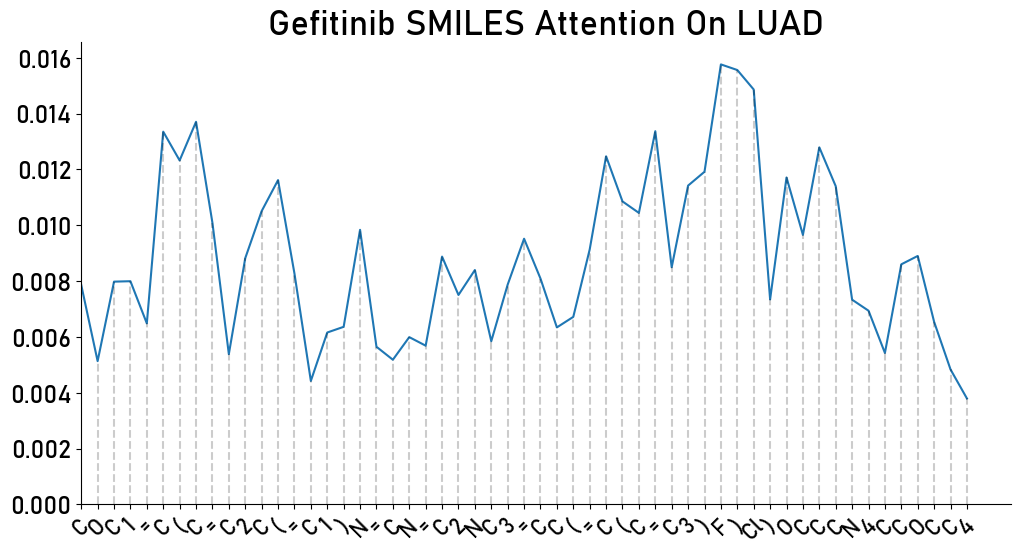

In [251]:
# 将single_drug_observe_224_255画成折线图,第三行是attention，是数值型，所以画成折线图
# 将single_drug_observe_224_255[2]变成浮点数  
single_drug_observe_y = single_drug_observe_224_255[2].astype(float)
single_drug_observe_x = single_drug_observe_224_255[1]
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
plt.plot(single_drug_observe_y)
# 每个点与X轴加上虚线
for i in range(len(single_drug_observe_y)):
    plt.vlines(i, 0, single_drug_observe_y[i], linestyles='dashed', colors='black', alpha=0.2)
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On LUAD', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), single_drug_observe_x)
plt.ylim(bottom=0)
plt.xlim(left=0)

plt.savefig(drug_name + '_SMILES_Attention_Observation.png', dpi=300, bbox_inches='tight')
plt.show()

In [235]:
df_pathways_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')
# 筛选出drug = Oxaliplatin
df_pathways_att_single_drug = df_pathways_att[df_pathways_att['drug'] == drug_name]
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_pathways_att_single_drug = df_pathways_att_single_drug[df_pathways_att_single_drug['cell_line'].isin(cell_line)]
print(df_pathways_att_single_drug.shape)
df_pathways_att_single_drug.head()

(2, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
9578,Gefitinib,HCC827,LUAD,0.00136,0.001635,0.001533,0.001482,0.001694,0.001605,0.001558,...,0.001534,0.001393,0.001500,0.001498,0.001404,0.001506,0.002544,0.001405,0.002601,0.001517
9802,Gefitinib,PC14,LUAD,0.00136,0.001690,0.001532,0.001587,0.001704,0.001691,0.001603,...,0.001533,0.001381,0.001483,0.001422,0.001405,0.001545,0.002579,0.001413,0.002483,0.001469


In [236]:
# 将df_pathways_att_oxaliplatin从第四列开始的数据取均值
df_pathways_single_drug_mean = df_pathways_att_single_drug.iloc[:, 3:].mean(axis=0)
df_pathways_single_drug_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            0.001360
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            0.001662
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      0.001533
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.001535
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    0.001699
dtype: float64

In [237]:
df_pathways_info_origin = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
df_pathways_info_origin.head()

,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
0,0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,N01394,Env factor,Mitochondrial ROS formation
1,1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,N01401,Env factor,CYP-mediated ROS formation
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,N01352,Env factor,ERK signaling
3,3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,N01386,Env factor,DNA adduct formation
4,4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,N01364,Env factor,Nuclear receptor signaling


In [238]:
# 筛选出pathway_class是target_pathway的数据  暂时抛弃
df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_class'].isin(target_pathway)]
# 筛选出df_pathways_info中pathway_name包含EGFR或者ERBB2的数据
# df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_name'].str.contains('EGFR|ERBB2')]
print(df_pathways_info.shape)
df_pathways_info.head()

(63, 5)


,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,N01352,Env factor,ERK signaling
5,5,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALIN...,N01353,Env factor,ERK signaling
10,10,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_RAS_ERK_SIGN...,N01408,Env factor,ERK signaling
12,12,KEGG_MEDICUS_ENV_FACTOR_NICOTINE_NNK_TO_PI3K_S...,N01348,Env factor,PI3K signaling
13,13,KEGG_MEDICUS_ENV_FACTOR_NNK_NNN_TO_CHRNA7_E2F_...,N01337,Env factor,Cell cycle


In [239]:
df_gep = pd.read_csv('../../data/GeneExp_Wilcoxon_test_Analysis_Log10_P_value_C2_KEGG_MEDICUS.csv')
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_gep = df_gep[df_gep['cell_line'].isin(cell_line)]
# 从第二列开始取均值
df_gep_mean = df_gep.iloc[:, 1:].mean(axis=0)
df_gep_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            4.331809
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            0.962244
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      2.132880
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.120653
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    1.227052
dtype: float64

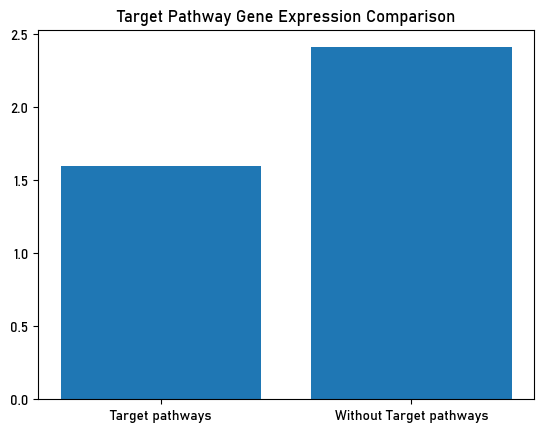

In [240]:
# 从df_gep_mean取出DNA_replication的数据
df_gep_mean_DNA_replication = df_gep_mean[df_gep_mean.index.isin(df_pathways_info['pathway_name'])]
df_gep_mean_without_DNA_replication = df_gep_mean[~df_gep_mean.index.isin(df_pathways_info['pathway_name'])]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_gep_mean_DNA_replication.mean(), df_gep_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Gene Expression Comparison')
plt.show()

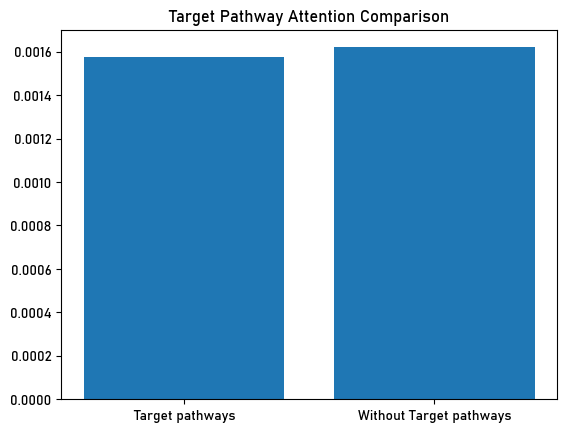

In [241]:
DNA_replication_pathways = df_pathways_info['pathway_name']
# 从df_pathways_att_oxaliplatin_mean取出DNA_replication_pathways的数据
df_pathways_att_oxaliplatin_mean_DNA_replication = df_pathways_single_drug_mean[df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
df_pathways_att_mean_without_DNA_replication = df_pathways_single_drug_mean[~df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_pathways_att_oxaliplatin_mean_DNA_replication.mean(), df_pathways_att_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Attention Comparison')
plt.show()

In [242]:
# 将df_pathways_single_drug_mean设置为dataframe
df_pathways_single_drug_mean = pd.DataFrame(df_pathways_single_drug_mean)
df_pathways_single_drug_mean.columns = ['attention']
df_pathways_single_drug_mean['pathway_name'] = df_pathways_single_drug_mean.index

In [243]:
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
# 根据attention排序
df_pathways_single_drug_mean = df_pathways_single_drug_mean.sort_values(by='attention', ascending=False)
print(df_pathways_single_drug_mean.shape)
df_pathways_single_drug_mean.head()

(619, 2)


,attention,pathway_name
458,0.002679,KEGG_MEDICUS_REFERENCE_UREA_CYCLE
152,0.002679,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATHWAY
288,0.002675,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...
281,0.002672,KEGG_MEDICUS_REFERENCE_HYDROLYSIS_OF_SPHINGOMY...
153,0.002671,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...


In [244]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head()

(63, 6)


,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002511,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,358,N01163,Reference,PI3K signaling
1,0.002504,KEGG_MEDICUS_REFERENCE_ERK_RSK_SIGNALING,238,N01601,Reference,MAPK signaling
2,0.002494,KEGG_MEDICUS_REFERENCE_BCR_BCAP_CD19_PI3K_SIGN...,141,N01695,Reference,PI3K signaling
3,0.002478,KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNAL...,377,N01165,Reference,PI3K signaling
4,0.002427,KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RA...,399,N01595,Reference,MAPK signaling


In [245]:
# 将df_pathways_single_drug_mean中pathway_name列存在在DNA_replication_pathways中，颜色标注为红色，其余为蓝色
df_pathways_single_drug_mean['color'] = np.where(df_pathways_single_drug_mean['pathway_name'].isin(DNA_replication_pathways), 'r', 'b')
# 重置索引
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
df_pathways_single_drug_mean.head(50)

,attention,pathway_name,color
0,0.002679,KEGG_MEDICUS_REFERENCE_UREA_CYCLE,b
1,0.002679,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATHWAY,b
2,0.002675,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,b
3,0.002672,KEGG_MEDICUS_REFERENCE_HYDROLYSIS_OF_SPHINGOMY...,b
4,0.002671,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,b
5,0.002667,KEGG_MEDICUS_REFERENCE_PROK_PRKR_GI_ERK_SIGNAL...,b
6,0.002666,KEGG_MEDICUS_REFERENCE_NOTCH_LIGAND_UBIQUITYLA...,b
7,0.002664,KEGG_MEDICUS_REFERENCE_CCR5_GNB_G_PLCB_G_PKC_S...,b
8,0.002657,KEGG_MEDICUS_REFERENCE_NAD_BIOSYNTHESIS,b
9,0.002652,KEGG_MEDICUS_REFERENCE_THYROID_HORMONE_SIGNALI...,b


中值: 0.0015323565


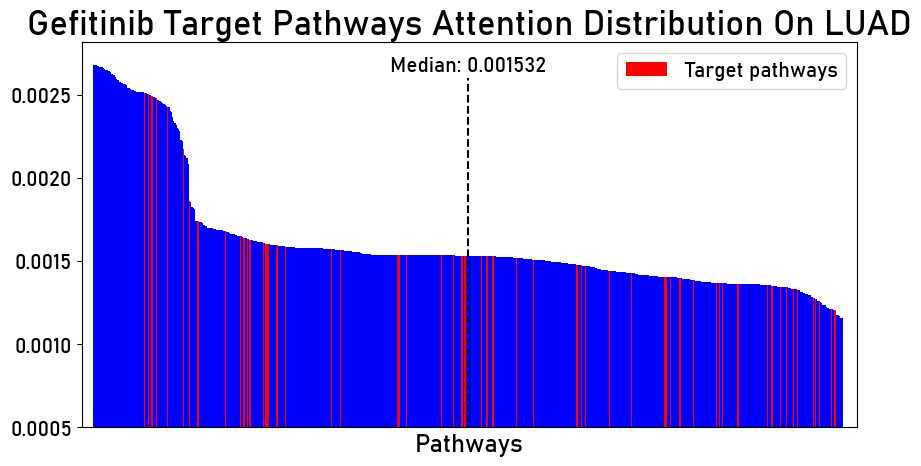

In [246]:
# 设置画布大小
plt.figure(figsize=(10, 5))
# 画出df_pathways_single_drug_mean的柱状图
plt.bar(df_pathways_single_drug_mean['pathway_name'], df_pathways_single_drug_mean['attention'], color=df_pathways_single_drug_mean['color'],width=1)
# 在柱状图的中值上画一条竖线,在竖线上标注中值
plt.vlines(309, 0, 0.0026, linestyles='dashed', colors='black', alpha=1)
# plt.text(309, 0.0026, 'Median', ha='center', va='bottom', fontsize=10)
# 在图中标注中值
plt.text(309, 0.00262, 'Median: 0.001532', ha='center', va='bottom', fontsize=15)
# 画一个label：红色代表Target pathways
plt.bar([0], [0], color='r', label='Target pathways')
# 画一个label：蓝色代表Without Target pathways
# plt.bar([0], [0], color='b', label='Without Target pathways')
# 显示label
plt.legend(fontsize=15)
# 打印出中值
print('中值:',df_pathways_single_drug_mean['attention'].median())
plt.title(drug_name + ' Target Pathways Attention Distribution On LUAD', fontsize=25)
plt.xticks([])
plt.yticks(fontsize=15)
plt.ylim(bottom=0.0005)
plt.xlim(left=-10, right=630)
plt.xlabel('Pathways', fontsize=18)
# 保存图片
plt.savefig(drug_name + '_NSCLC_Target_Pathway_Attention_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [247]:
# 帮我找出所有color为r的index
target_pathways = df_pathways_single_drug_mean[df_pathways_single_drug_mean['color'] == 'r']
# 将每个index除以618，得到比例
p = (target_pathways.index+1) / 619
print('所占百分比:',p)

所占百分比: Index([0.06946688206785137, 0.07431340872374798,  0.0791599353796446,
       0.08562197092084006, 0.10016155088852989, 0.12116316639741519,
       0.12924071082390953, 0.14054927302100162,  0.1777059773828756,
       0.19709208400646203, 0.20193861066235863, 0.20678513731825526,
         0.210016155088853, 0.22778675282714056,  0.2310177705977383,
       0.23263327948303716, 0.23424878836833601,  0.2455573505654281,
       0.24717285945072698,  0.2568659127625202,  0.3182552504038772,
       0.33117932148626816,   0.407108239095315,  0.4087237479806139,
        0.4184168012924071, 0.46526655896607433,   0.481421647819063,
        0.4927302100161551, 0.49596122778675283,  0.4975767366720517,
         0.518578352180937,  0.5250403877221325,  0.5266558966074314,
        0.5331179321486268,  0.5347334410339257,  0.5654281098546042,
        0.5880452342487884,  0.6462035541195477,  0.6526655896607432,
        0.6575121163166397,  0.6898222940226171,  0.7189014539579968,
        0.762

In [248]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head(100)

(63, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002511,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,r,358,N01163,Reference,PI3K signaling
1,0.002504,KEGG_MEDICUS_REFERENCE_ERK_RSK_SIGNALING,r,238,N01601,Reference,MAPK signaling
2,0.002494,KEGG_MEDICUS_REFERENCE_BCR_BCAP_CD19_PI3K_SIGN...,r,141,N01695,Reference,PI3K signaling
3,0.002478,KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNAL...,r,377,N01165,Reference,PI3K signaling
4,0.002427,KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RA...,r,399,N01595,Reference,MAPK signaling
...,...,...,...,...,...,...,...
58,0.001280,KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RA...,r,401,N01600,Reference,MAPK signaling
59,0.001274,KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_JNK_SIGNAL...,r,225,N00542,Reference,MAPK signaling
60,0.001260,KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RA...,r,404,N01599,Reference,MAPK signaling
61,0.001212,KEGG_MEDICUS_REFERENCE_GF_RTK_RAS_PI3K_SIGNALI...,r,254,N01658,Reference,PI3K signaling


In [249]:
# 将df_pathways_single_drug_mean与df_pathways_info_origin合并
df_pathways_single_drug_mean_merge_origin = pd.merge(df_pathways_single_drug_mean, df_pathways_info_origin, on='pathway_name')
print(df_pathways_single_drug_mean_merge_origin.shape)
df_pathways_single_drug_mean_merge_origin.head(200)

(619, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002679,KEGG_MEDICUS_REFERENCE_UREA_CYCLE,b,458,N00593,Reference,Urea cycle
1,0.002679,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATHWAY,b,152,N01458,Reference,TGFB signaling
2,0.002675,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,b,288,N01090,Reference,Cytoskeletal regulation (viruses and bacteria)
3,0.002672,KEGG_MEDICUS_REFERENCE_HYDROLYSIS_OF_SPHINGOMY...,b,281,N00649,Reference,Sphingolipid degradation
4,0.002671,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,b,153,N01461,Reference,TGFB signaling
...,...,...,...,...,...,...,...
195,0.001572,KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_ERK_SIGNAL...,b,224,N00001,Reference,Colorectal cancer
196,0.001572,KEGG_MEDICUS_REFERENCE_E2_ER_RAS_ERK_SIGNALING...,r,216,N01351,Reference,ERK signaling
197,0.001570,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,b,551,N01006,Variant,Alzheimer disease
198,0.001569,KEGG_MEDICUS_REFERENCE_PLASMIN_MEDIATED_ACTIVA...,b,381,N01460,Reference,TGFB signaling
